In [4]:
#Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Chargement des datas
df = pd.read_excel(r"C:\Users\Jppok\OneDrive\Documents\Projet DA_Portfolio\data\CorporateCreditRating.xlsx")

#Afficher les 1ères lignes
print(df.head())

#Vérifier la structure des données
print(df.info())

                        Rating Agency                     Corporation Rating  \
0  Standard & Poor's Ratings Services       American States Water Co.     A-   
1  Standard & Poor's Ratings Services  Automatic Data Processing Inc.    AAA   
2  Standard & Poor's Ratings Services                      Avnet Inc.   BBB-   
3  Standard & Poor's Ratings Services    California Water Service Co.    AA-   
4  Standard & Poor's Ratings Services            Cardinal Health Inc.      A   

  Rating Date      CIK  Binary Rating  SIC Code Sector Ticker  Current Ratio  \
0  2010-07-30  1056903              1      4941  Utils    AWR         1.1507   
1  2010-09-16     8670              1      7374  BusEq    ADP         1.1129   
2  2010-11-23     8858              1      5065  Shops    AVT         1.9276   
3  2010-06-29  1035201              1      4941  Utils    CWT         0.8358   
4  2010-07-14   721371              1      5122  Shops    CAH         1.2931   

   ...  EBITDA Margin  Pre-Tax Profit 

In [ ]:
df["Rating Agency"] = df["Rating Agency"].astype(str)
print(df.dtypes)

In [ ]:
#Vérifier les valeurs manquantes et doublons
    #valeurs manquantes
print(df.isnull().sum())

    #doublons
duplicates = df.duplicated().sum()
print("Nombre de doublons:", duplicates)

In [ ]:
#Affichage des effectifs par notation de crédit

df["Rating"].value_counts().plot(kind="bar", figsize=(8, 4))
    #Ajouter des titres et labels
plt.title("Répartition des notations de crédit")
plt.xlabel("Notation")
plt.ylabel("Nombre d'entreprises")
    #Afficher le graphique
plt.show()

#Distribution des notations de crédit
df["Rating"].hist(figsize=(12, 8), bins=30)

plt.title("Distribution des notations de crédit")
plt.xlabel("Notation")
plt.ylabel("Nombre d'entreprises")
plt.show()

In [ ]:
#Analyse des ratios financiers 
#Sélection des ratios 
ratios = ["Current Ratio", "Debt/Equity Ratio", "ROE - Return On Equity"]

#histogrammes
plt.figure(figsize=(15, 5))
for i, ratio in enumerate(ratios, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[ratio], bins=30, kde=True)
    plt.title(f"Distribution de {ratio}")
    plt.xlabel(ratio)
    plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

#Statistique descriptive
df[ratios].describe()

In [ ]:
#Analyse écart interquartile
total_rows = df.shape[0] #Nombre total d'observations 

for i, ratio in enumerate(ratios, 1):
    Q1 = df[ratio].quantile(0.25) #1er quartile
    Q3 = df[ratio].quantile(0.75) #2ème quartile
    IQR = Q3 - Q1

    #Filtrage des valeurs aberrantes
    val_aberrantes = df[(df[ratio] < (Q1 - 1.5 * IQR)) | (df[ratio] > (Q3 + 1.5 * IQR))]
    
    print(f"Ratio : {ratio}")
    print(f" - Valeurs aberrantes : {val_aberrantes.shape[0]}")
    print(f" - Pourcentage du total : {round((val_aberrantes.shape[0]/total_rows)*100, 2)} %\n")

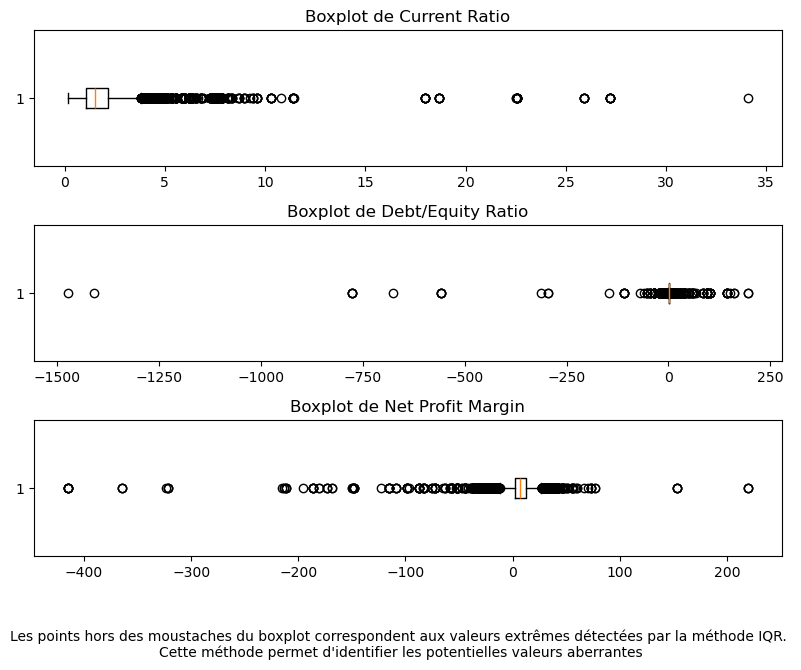

In [8]:
#Dispersion avec boxplot
plt.figure(figsize=(8, 6))
    #Afficher plusieurs graphs (subplot)
plt.subplot(3, 1, 1)
plt.boxplot(df["Current Ratio"], vert=False)
plt.title("Boxplot de Current Ratio")
plt.subplot(3, 1, 2)
plt.boxplot(df["Debt/Equity Ratio"], vert=False)
plt.title("Boxplot de Debt/Equity Ratio")
plt.subplot(3, 1, 3)
plt.boxplot(df["Net Profit Margin"], vert=False)
plt.title("Boxplot de Net Profit Margin")
plt.figtext(0.5, -0.1, 
            "Les points hors des moustaches du boxplot correspondent aux valeurs extrêmes détectées par la méthode IQR. \n"
            "Cette méthode permet d'identifier les potentielles valeurs aberrantes", 
            wrap=True, horizontalalignment="center", fontsize=10)
plt.tight_layout()  # Ajuster l'espacement

In [10]:
#Etude des relations entre variables (corrélations, tendances).

#Convertir la notation de crédit en score numérique 
rating_mapping = {
    "AAA": 1, "AA+": 2, "AA": 3, "AA-": 4,
    "A+": 5, "A": 6, "A-": 7,
    "BBB+": 8, "BBB": 9, "BBB-": 10,
    "BB+": 11, "BB": 12, "BB-": 13,
    "B+": 14, "B": 15, "B-": 16,
    "CCC+": 17, "CCC": 18, "CCC-": 19,
    "CC+": 20, "CC": 21,
    "C": 22, "D": 23
}
#Associe la notation au nouveau score numérique 
df["Rating_Score"] = df["Rating"].map(rating_mapping)

#Analyse avec la matrice de corrélation
df[["Rating_Score", "Current Ratio", "Debt/Equity Ratio", "Long-term Debt / Capital", 
          "ROE - Return On Equity", "Net Profit Margin", "EBITDA Margin", "ROI - Return On Investment", 
          "Return On Tangible Equity", "ROA - Return On Assets"]].corr()

,Rating_Score,Current Ratio,Debt/Equity Ratio,Long-term Debt / Capital,ROE - Return On Equity,Net Profit Margin,EBITDA Margin,ROI - Return On Investment,Return On Tangible Equity,ROA - Return On Assets
Rating_Score,1.000000,0.167727,-0.020683,0.041973,-0.041502,-0.268564,-0.206833,-0.234315,-0.041745,-0.343829
Current Ratio,0.167727,1.000000,0.007654,-0.004393,-0.022294,-0.018924,-0.096756,-0.026329,-0.008378,-0.002097
Debt/Equity Ratio,-0.020683,0.007654,1.000000,-0.004484,0.462110,0.005810,-0.001529,0.007483,0.003828,0.008617
Long-term Debt / Capital,0.041973,-0.004393,-0.004484,1.000000,0.001796,-0.017555,-0.007478,0.573543,-0.004130,-0.020476
ROE - Return On Equity,-0.041502,-0.022294,0.462110,0.001796,1.000000,0.011705,-0.010464,0.023968,0.010057,0.021743
Net Profit Margin,-0.268564,-0.018924,0.005810,-0.017555,0.011705,1.000000,0.761834,0.427372,0.024000,0.789726
EBITDA Margin,-0.206833,-0.096756,-0.001529,-0.007478,-0.010464,0.761834,1.000000,0.336851,0.001307,0.629262
ROI - Return On Investment,-0.234315,-0.026329,0.007483,0.573543,0.023968,0.427372,0.336851,1.000000,0.027178,0.568563
Return On Tangible Equity,-0.041745,-0.008378,0.003828,-0.004130,0.010057,0.024000,0.001307,0.027178,1.000000,0.059687
ROA - Return On Assets,-0.343829,-0.002097,0.008617,-0.020476,0.021743,0.789726,0.629262,0.568563,0.059687,1.000000


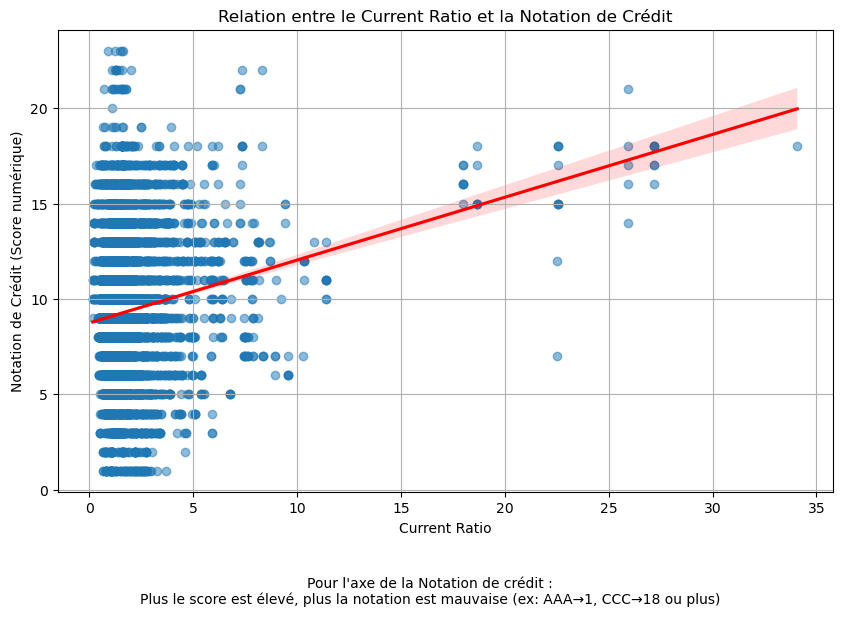

In [20]:
#VISUALISATION 
 
#Ratio de liquidité
#Nuage de point  avec une courbe de tendance
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Current Ratio"], y=df["Rating_Score"], 
            scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})

plt.title("Relation entre le Current Ratio et la Notation de Crédit")
plt.xlabel("Current Ratio")
plt.ylabel("Notation de Crédit (Score numérique)")
plt.grid(True)
plt.figtext(0.5, -0.1, 
            "Pour l'axe de la Notation de crédit : \n"
            "Plus le score est élevé, "
            "plus la notation est mauvaise (ex: AAA→1, CCC→18 ou plus) \n", 
            wrap=True, horizontalalignment="center", fontsize=10)

plt.show()

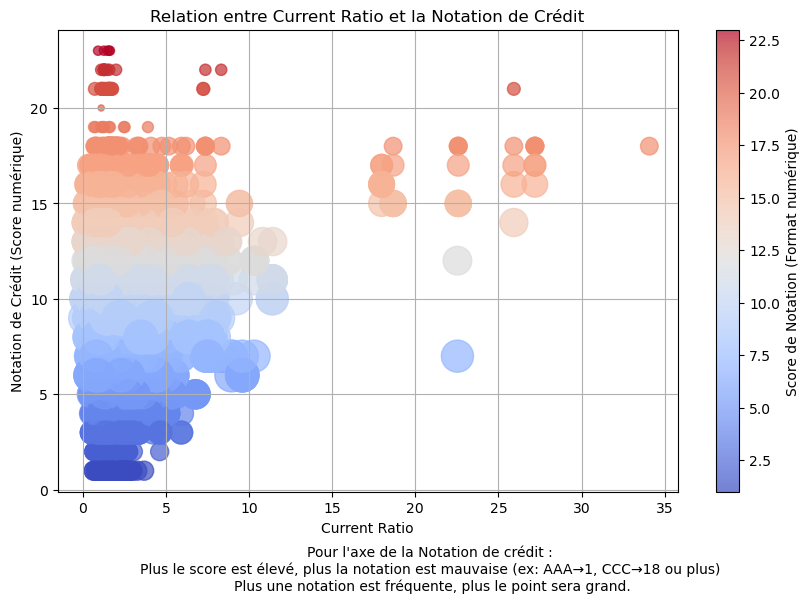

In [15]:
#Nombre d'entreprises par Rating_Score 
rating_counts = df["Rating_Score"].value_counts()

#Rating_count pour associer le nombre d'entreprise à la note de Rating score
df["Rating_Count"] = df["Rating_Score"].map(rating_counts)

# Définir la taille des points en fonction du nombre d’entreprises ayant la même note
#Racine carrée (sqrt) pour atténuer l'effet de la distribution hétérogène de Rating_score 
point_sizes = np.sqrt(df["Rating_Count"]) * 20  

#Nuage de point 
plt.figure(figsize=(10, 6))
plt.scatter(x=df["Current Ratio"], y=df["Rating_Score"], 
            s=point_sizes, c=df["Rating_Score"], alpha=0.7, cmap="coolwarm")

plt.title("Relation entre Current Ratio et la Notation de Crédit")
plt.xlabel("Current Ratio")
plt.ylabel("Notation de Crédit (Score numérique)")
plt.colorbar(label="Score de Notation (Format numérique)")
plt.grid(True)
plt.figtext(0.5, -0.05, 
            "Pour l'axe de la Notation de crédit : \n"
            "Plus le score est élevé, "
            "plus la notation est mauvaise (ex: AAA→1, CCC→18 ou plus) \n"
            "Plus une notation est fréquente, plus le point sera grand.", 
            wrap=True, horizontalalignment="center", fontsize=10)

plt.show()

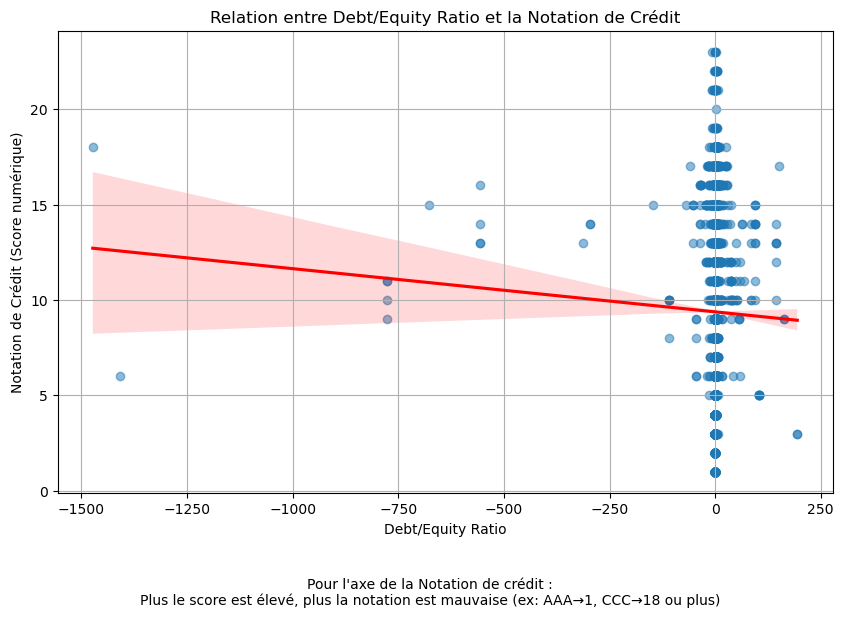

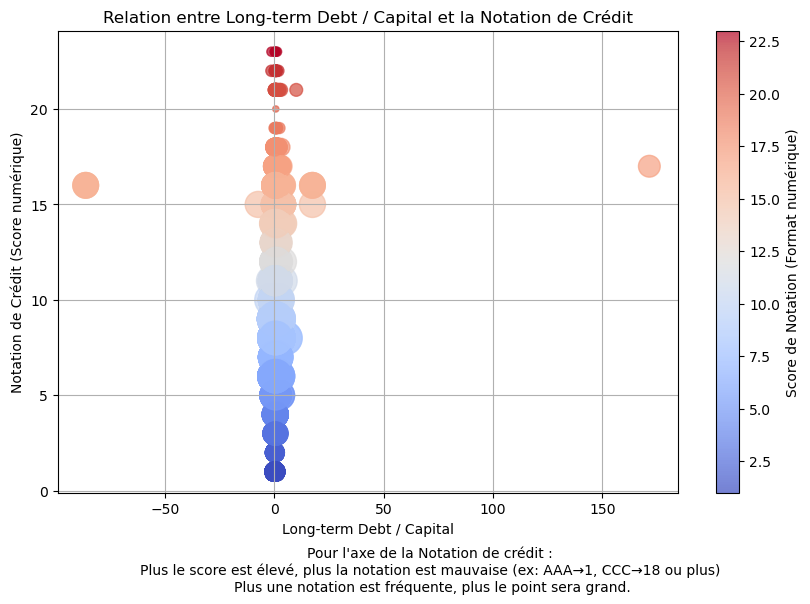

In [17]:
#Ratio d'endettement 
#Debt/Equity Ratio
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Debt/Equity Ratio"], y=df["Rating_Score"], 
            scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})

plt.title("Relation entre Debt/Equity Ratio et la Notation de Crédit")
plt.xlabel("Debt/Equity Ratio")
plt.ylabel("Notation de Crédit (Score numérique)")
plt.grid(True)
plt.figtext(0.5, -0.1, 
            "Pour l'axe de la Notation de crédit : \n"
            "Plus le score est élevé, "
            "plus la notation est mauvaise (ex: AAA→1, CCC→18 ou plus) \n", 
            wrap=True, horizontalalignment="center", fontsize=10)

plt.show()

#Long-term Debt / Capital
plt.figure(figsize=(10, 6))
plt.scatter(x=df["Long-term Debt / Capital"], y=df["Rating_Score"], 
            s=point_sizes, c=df["Rating_Score"], alpha=0.7, cmap="coolwarm")

plt.title("Relation entre Long-term Debt / Capital et la Notation de Crédit")
plt.xlabel("Long-term Debt / Capital")
plt.ylabel("Notation de Crédit (Score numérique)")
plt.colorbar(label="Score de Notation (Format numérique)")
plt.grid(True)
plt.figtext(0.5, -0.05, 
            "Pour l'axe de la Notation de crédit : \n"
            "Plus le score est élevé, "
            "plus la notation est mauvaise (ex: AAA→1, CCC→18 ou plus) \n"
            "Plus une notation est fréquente, plus le point sera grand.", 
            wrap=True, horizontalalignment="center", fontsize=10)
plt.show()

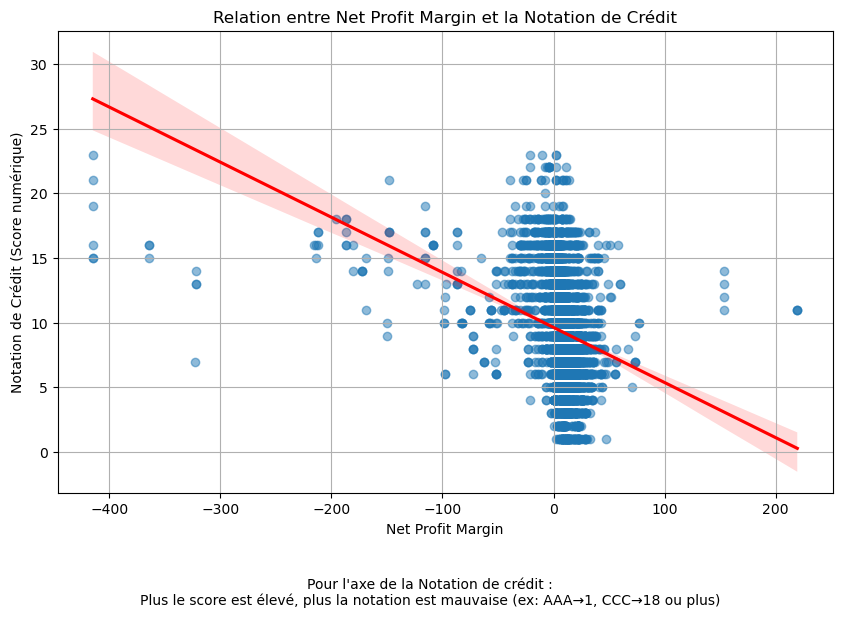

NameError: name 'point_sizes' is not defined

<Figure size 1000x600 with 0 Axes>

In [12]:
#Ratio de rentabilité 
#Net Profit Margin
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Net Profit Margin"], y=df["Rating_Score"], 
            scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})

plt.title("Relation entre Net Profit Margin et la Notation de Crédit")
plt.xlabel("Net Profit Margin")
plt.ylabel("Notation de Crédit (Score numérique)")
plt.grid(True)
plt.figtext(0.5, -0.1, 
            "Pour l'axe de la Notation de crédit : \n"
            "Plus le score est élevé, "
            "plus la notation est mauvaise (ex: AAA→1, CCC→18 ou plus) \n", 
            wrap=True, horizontalalignment="center", fontsize=10)

plt.show()

#ROE - Return On Equity
plt.figure(figsize=(10, 6))
plt.scatter(x=df["ROE - Return On Equity"], y=df["Rating_Score"], 
            s=point_sizes, c=df["Rating_Score"], alpha=0.7, cmap="coolwarm")

plt.title("Relation entre ROE - Return On Equity et la Notation de Crédit")
plt.xlabel("ROE - Return On Equity")
plt.ylabel("Notation de Crédit (Score numérique)")
plt.colorbar(label="Score de Notation (Format numérique)")
plt.grid(True)
plt.figtext(0.5, -0.05, 
            "Pour l'axe de la Notation de crédit : \n"
            "Plus le score est élevé, "
            "plus la notation est mauvaise (ex: AAA→1, CCC→18 ou plus) \n"
            "Plus une notation est fréquente, plus le point sera grand.", 
            wrap=True, horizontalalignment="center", fontsize=10)

plt.show()

In [ ]:
#NORMALISATION DES RATIOS POUR POUVOIR LES COMPARER ENTRE EUX,